In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

In [2]:
import pandas as pd
data=pd.read_csv(r"../data_prep/prism_df_summer_12413370.csv")
print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0            147  2010-06-01     18.76               7.1               10.8   
1            148  2010-06-02      3.32               7.0               11.9   
2            149  2010-06-03     20.07               7.4               10.0   
3            150  2010-06-04      2.77               5.7               10.3   
4            151  2010-06-05     15.01               6.7               10.0   
...          ...         ...       ...               ...                ...   
1007        3868  2021-08-27      0.66               6.7               15.0   
1008        3869  2021-08-28      1.00               6.7               13.4   
1009        3870  2021-08-29      0.00               5.2               14.9   
1010        3871  2021-08-30      0.00               6.0               16.7   
1011        3872  2021-08-31      0.00               6.0               16.1   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.726546
X_00010_00001,0.726546,1.000000


                  ppt..mm.  tmax..degrees.C.  X_00060_00003       doy
ppt..mm.          1.000000         -0.527871       0.311101 -0.271970
tmax..degrees.C. -0.527871          1.000000      -0.423039  0.433251
X_00060_00003     0.311101         -0.423039       1.000000 -0.533105
doy              -0.271970          0.433251      -0.533105  1.000000


<Axes: >

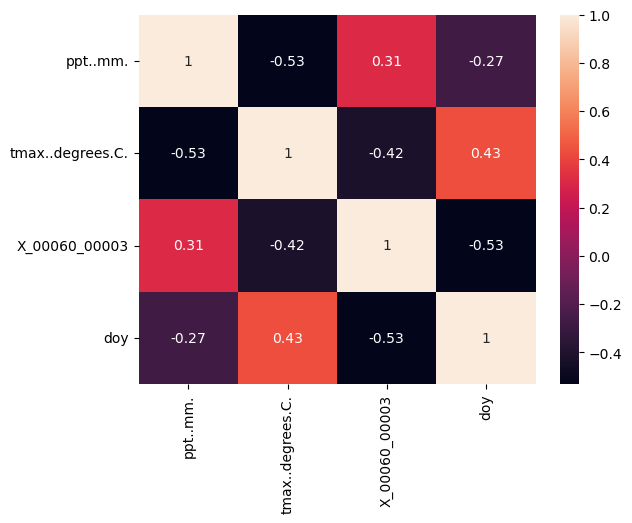

In [4]:
idv=[ 'ppt..mm.' #, 'tmin..degrees.C.','tmean..degrees.C.'
     , 'tmax..degrees.C.', #'tdmean..degrees.C.',
     #  'vpdmin..hPa.', 
    # 'vpdmax..hPa.', 
   
     #   'X_00010_00001', # dep
 # 'X_00010_00003',  
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)



In [5]:
input=  data[  idv].to_numpy()

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00001'], test_size=0.2, random_state=42)


0.9052264426148909


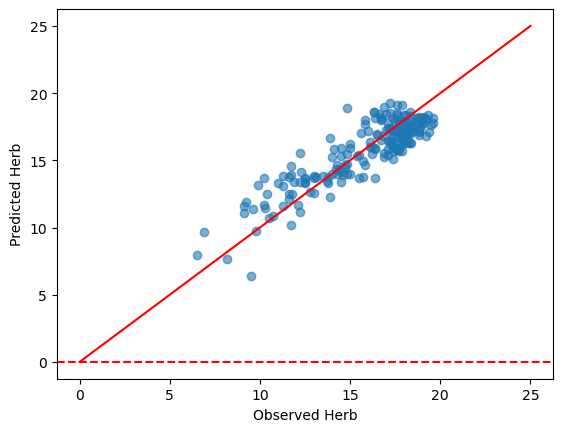

test: 0.8809595788042355
1.1264598270021193


In [6]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed Herb")
plt.ylabel("Predicted Herb")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [7]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.7951870435538858
test correlation_coefficient: 0.7837115787979053
MSE: 1.4217937468280426
RMS: 1.7982907209574757
max depth: 2
test correlation_coefficient: 0.8818892477093005
test correlation_coefficient: 0.8637872723742873
MSE: 1.1288320159911747
RMS: 1.4747933075631312
max depth: 3
test correlation_coefficient: 0.9178696676925556
test correlation_coefficient: 0.8901616897353847
MSE: 1.0340785776308619
RMS: 1.3276872380340212
max depth: 4
test correlation_coefficient: 0.9382299960870326
test correlation_coefficient: 0.8954838342262395
MSE: 1.0347210225635253
RMS: 1.288861367866839
max depth: 5
test correlation_coefficient: 0.9516986342351348
test correlation_coefficient: 0.9050225072024003
MSE: 0.9774269300819796
RMS: 1.2310436184804054
max depth: 6
test correlation_coefficient: 0.9645759354725327
test correlation_coefficient: 0.9098736791044868
MSE: 0.9193214699377747
RMS: 1.2053643206729838
max depth: 7
test correlation_coefficient: 0.97

max depth: 6
correlation_coefficient: 0.9098736791044868
MSE: 0.9193214699377747
RMS: 1.2053643206729838


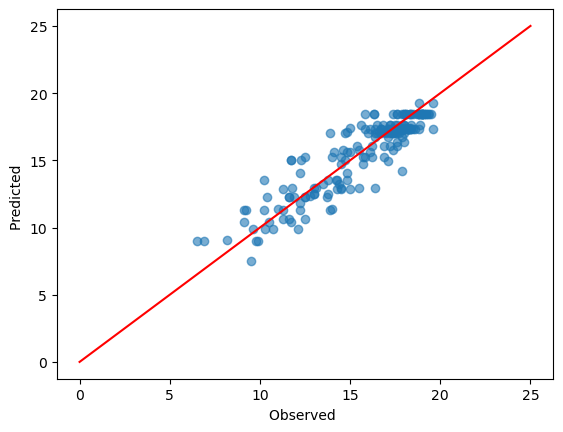

In [8]:
print("max depth:", 6)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [9]:
print(regr.feature_importances_)
print(idv)

[0.02112413 0.07607733 0.77882737 0.12397116]
['ppt..mm.', 'tmax..degrees.C.', 'X_00060_00003', 'doy']


In [10]:
params = {
    "n_estimators": 250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [11]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.1333


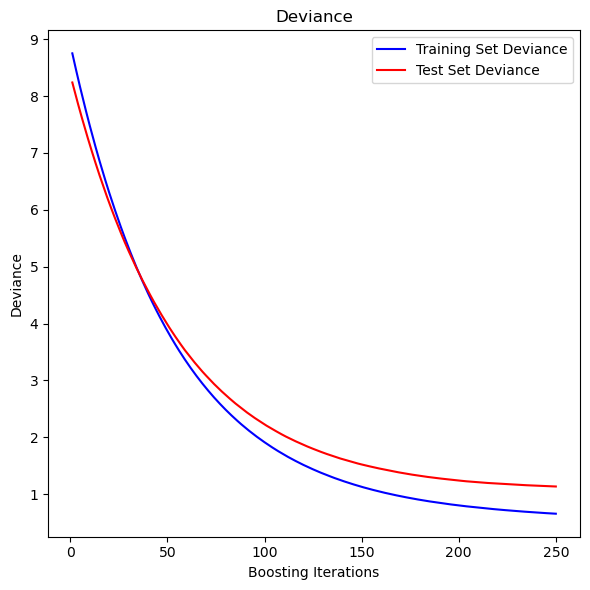

In [12]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

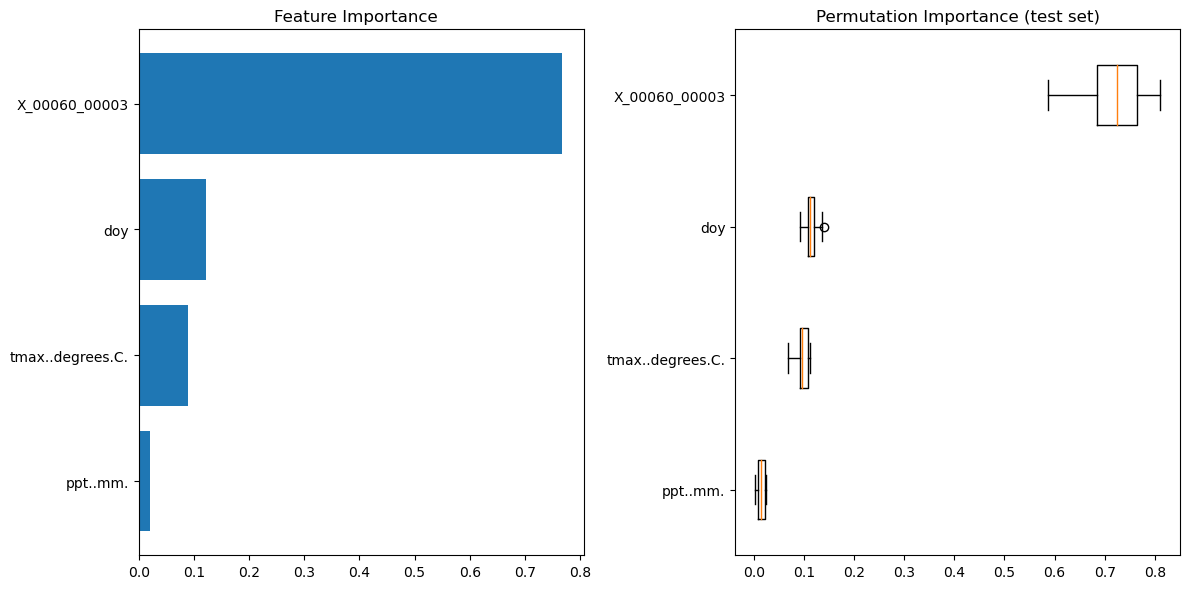

In [13]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

correlation_coefficient: 0.9344917041223326
MSE: 0.8292184346755269
RMS: 1.0645942929227459


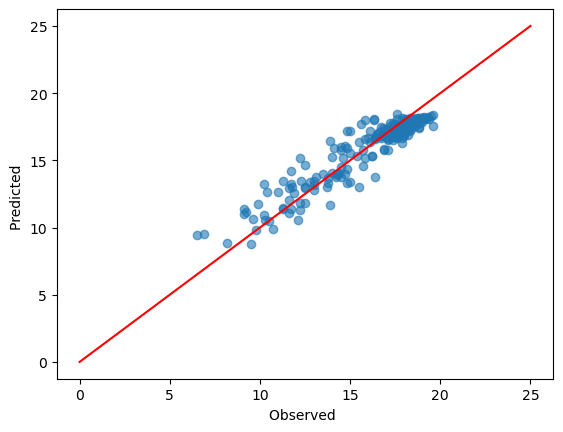

In [14]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

(array([ 4.,  6., 10.,  7., 17., 15.,  8., 14., 63., 59.]),
 array([ 8.80857264,  9.77108948, 10.73360632, 11.69612316, 12.65864   ,
        13.62115684, 14.58367368, 15.54619052, 16.50870736, 17.4712242 ,
        18.43374104]),
 <BarContainer object of 10 artists>)

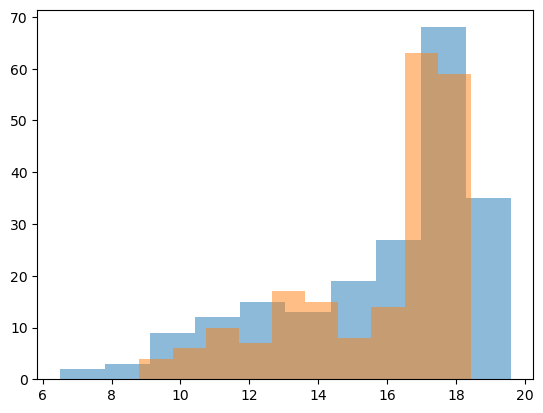

In [15]:
plt.hist(y_test , alpha=0.5)
plt.hist(yfit , alpha=0.5)